# Implimentation of Random Forest Algorithm from Scratch

### 1- What is RF and How RF work ?

Random Forest (RF) est un algorithme populaire d'apprentissage automatique qui appartient à la famille de l'ensemble learning. Il est utilisé à la fois pour des tâches de classification et de régression. Les Forêts Aléatoires reposent sur la base des arbres de décision et utilisent une technique appelée bagging (Bootstrap Aggregating) pour améliorer les performances et la robustesse des arbres individuels.

Voici un aperçu de son fonctionnement :

1. **Arbres de Décision :**
   - Un arbre de décision est une structure de type organigramme où chaque nœud interne représente un test sur un attribut, chaque branche représente le résultat du test, et chaque nœud feuille représente la décision finale ou la sortie.
   - Les arbres de décision peuvent être sujets à la surajustement (overfitting), ce qui signifie qu'ils peuvent bien performer sur les données d'entraînement mais moins bien sur de nouvelles données non vues.

2. **Bagging :**
   - Les Forêts Aléatoires utilisent une technique appelée bagging pour réduire le surajustement. Le bagging implique la création de multiples sous-ensembles des données d'entraînement en sélectionnant aléatoirement des échantillons avec remplacement (bootstrap samples).
   - Pour chaque sous-ensemble, un arbre de décision est construit. Comme les sous-ensembles sont créés avec remplacement, certains points de données peuvent être répétés et d'autres peuvent être omis à chaque itération.

3. **Sélection Aléatoire des Caractéristiques :**
   - En plus d'utiliser différents sous-ensembles de données, les Forêts Aléatoires introduisent de l'aléatoire en ne considérant qu'un sous-ensemble aléatoire de caractéristiques à chaque division lors de la croissance d'un arbre.
   - Cela aide à décorréler les arbres individuels dans la forêt, rendant le modèle global plus robuste et moins susceptible au surajustement.

4. **Vote (Classification) ou Moyenne (Régression) :**
   - Une fois que tous les arbres individuels sont entraînés, ils font des prédictions collectives. Pour les tâches de classification, chaque arbre "vote" pour une classe, et la classe avec la majorité des votes devient la prédiction finale. Pour les tâches de régression, les prédictions de tous les arbres sont moyennées pour obtenir le résultat final.

5. **Robustesse et Généralisation :**
   - La nature ensembliste des Forêts Aléatoires contribue à améliorer les performances du modèle, sa robustesse et sa généralisation à de nouvelles données non vues. En combinant plusieurs arbres avec différentes perspectives sur les données, les Forêts Aléatoires ont tendance à produire des prédictions plus précises et stables.

Les Forêts Aléatoires sont largement utilisées dans diverses applications, notamment la classification d'images, la reconnaissance vocale et la finance, entre autres. Elles sont connues pour leur polyvalence, leur facilité d'utilisation et leur capacité à gérer des données de grande dimension.

![Forêts Aléatoires](img1.webp)

### 2- Avantage & Disavantage of random forest :

**Avantages de Random Forest :**

1. **Haute Précision :** Random Forests ont généralement une excellente précision en raison de la combinaison des prédictions de plusieurs arbres de décision.

2. **Robustesse aux Données Anormales :** En utilisant plusieurs arbres avec des sous-ensembles de données différents, Random Forests sont moins sensibles aux données aberrantes (outliers) et au surajustement par rapport à un seul arbre de décision.

3. **Gestion de Grandes Dimensions :** Ils peuvent gérer efficacement un grand nombre de caractéristiques (variables) et sont donc adaptés aux ensembles de données de grande dimension.

4. **Gestion de Données Manquantes :** Random Forests peuvent gérer des ensembles de données avec des valeurs manquantes sans nécessiter beaucoup de prétraitement.

5. **Évaluation de l'Importance des Caractéristiques :** Ils fournissent une mesure de l'importance des caractéristiques, ce qui peut être utile pour l'analyse et la sélection des caractéristiques.

6. **Facilité d'utilisation :** Ils sont relativement simples à utiliser, avec moins de paramètres à régler par rapport à d'autres algorithmes complexes.

**Inconvénients de Random Forest :**

1. **Difficile à Interpréter :** En raison de la complexité d'un grand nombre d'arbres, l'interprétation du modèle peut être difficile, surtout pour des ensembles de données volumineux.

2. **Consommation de Ressources :** Random Forests peuvent être gourmands en ressources, en particulier lorsqu'ils sont construits avec un grand nombre d'arbres.

3. **Temps de Formation :** Construire de nombreux arbres peut prendre du temps, surtout sur de grandes ensembles de données.

4. **Taille du Modèle :** Le modèle Random Forest peut occuper beaucoup d'espace mémoire, en particulier pour un grand nombre d'arbres et de caractéristiques.

5. **Moins Performant sur des Données Linéaires :** Si la relation entre les caractéristiques et la cible est linéaire, des modèles plus simples comme la régression linéaire pourraient être plus efficaces.

6. **Biais envers les Classes Majoritaires :** Dans des ensembles de données déséquilibrés, Random Forest peut être biaisé envers les classes majoritaires.

Bien que Random Forests aient des inconvénients, ils sont souvent choisis pour leur capacité à produire des résultats de haute qualité dans de nombreuses situations sans nécessiter une configuration complexe. Le choix d'utiliser Random Forests dépend souvent des caractéristiques spécifiques du problème et des données à traiter.

### 3- Implimentation :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [2]:
class RandomForestClassifier2:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            #tree = DecisionTree(max_depth=self.max_depth)
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            # Create a bootstrapped sample
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        final_result = []    
        for i in range(len(X)):
            # Find unique elements and their counts
            unique_elements, counts = np.unique(predictions[:,i], return_counts=True)
            # Find the index of the most frequent element
            most_common_index = np.argmax(counts)
            # Get the most repeated value
            final_result.append(unique_elements[most_common_index])
            
        return np.array(final_result)

In [3]:
class RandomForestRegressor2:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            #tree = DecisionTree(max_depth=self.max_depth)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            # Create a bootstrapped sample
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        final_result = []    
        for i in range(len(X)):
            final_result.append(np.mean(predictions[:,i]))
            
        return np.array(final_result)

### 4- Test & validation :

   #### 4-1- Classification: 

In [6]:
# load dataset from seaborn
dataSet = sns.load_dataset('iris')

# dataset infos
print("dataset shape : ", dataSet.shape)
print("iris dataset labels : ", list(dataSet.columns))
dataSet.head()

dataset shape :  (150, 5)
iris dataset labels :  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = dataSet[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
Y = dataSet["species"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

pd.DataFrame(X_train).head()

,0,1,2,3
0,5.0,3.6,1.4,0.2
1,5.2,4.1,1.5,0.1
2,5.8,2.7,5.1,1.9
3,6.0,3.4,4.5,1.6
4,6.7,3.1,4.7,1.5


accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

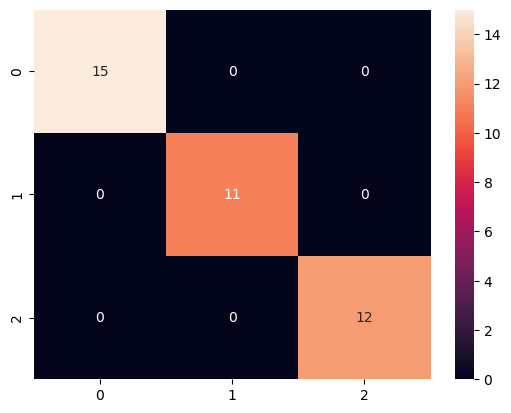

In [8]:
model = RandomForestClassifier2(n_trees=25, max_depth=3)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

# print("predicted data : ", predicted, "len predicted data : ", len(predicted))
# print("***********************************")
# print("original data : ", y_test, "len original data : ", len(y_test))
print("accuracy_score :", accuracy_score(y_test, predicted))
print("classification_report :", classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True) # annot = True pour afficher les nombres dans la matrice

Test the Original RF from sklearn :

accuracy_score : 1.0
classification_report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

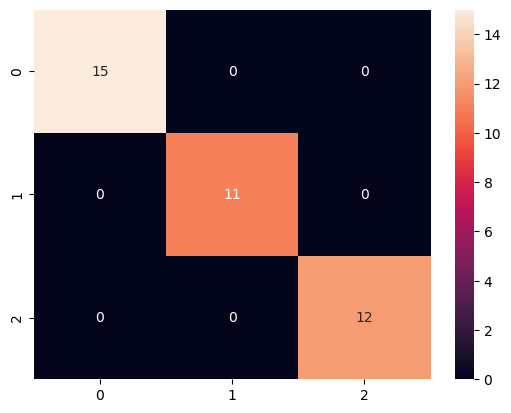

In [15]:
model_org = RandomForestClassifier(n_estimators=25,max_depth=3)
model_org.fit(X_train, y_train)
predicted_org = model_org.predict(X_test)

# print("predicted data : ", predicted, "len predicted data : ", len(predicted))
# print("***********************************")
# print("original data : ", y_test, "len original data : ", len(y_test))
print("accuracy_score :", accuracy_score(y_test, predicted_org))
print("classification_report :", classification_report(y_test, predicted_org))
cm2 = confusion_matrix(y_test, predicted_org)
sns.heatmap(cm2, annot = True) # annot = True pour afficher les nombres dans la matrice

#### 4.2 - Classification 2:

In [17]:
# load dataset from seaborn
data = pd.read_csv('Titanic.csv')

# dataset infos
print("dataset shape : ", data.shape)
print("tips dataset labels : ", list(data.columns))
data.head()

dataset shape :  (891, 12)
tips dataset labels :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.drop(["PassengerId", "Name", 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1, inplace=True)
data['Sex'] = data["Sex"].map({'male': 0, 'female': 1})
mean_age = data["Age"].mean()
data['Age'].fillna(mean_age, inplace=True)

X_class2 = data.drop("Survived", axis = 1).values
Y_class2 = data["Survived"].values

X_train_class2, X_test_class2, y_train_class2, y_test_class2 = train_test_split(X_class2, Y_class2, test_size=0.25, random_state=42)

pd.DataFrame(X_train_class2).head()

,0,1,2
0,1.0,0.0,29.699118
1,3.0,0.0,25.000000
2,2.0,1.0,24.000000
3,3.0,0.0,22.000000
4,1.0,0.0,0.920000


accuracy_score : 0.7982062780269058
classification_report :               precision    recall  f1-score   support

           0       0.81      0.87      0.84       134
           1       0.78      0.70      0.73        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



<Axes: >

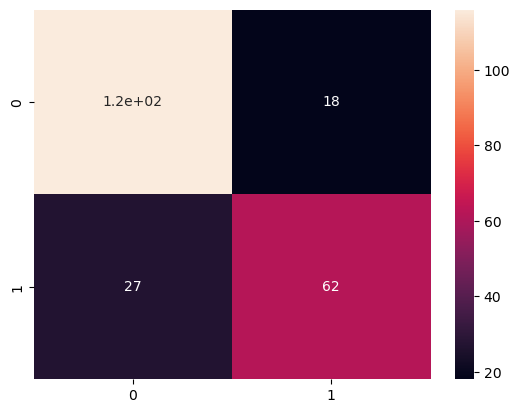

In [19]:
model_class2 = RandomForestClassifier2(n_trees=30, max_depth=3)
model_class2.fit(X_train_class2, y_train_class2)
predicted_class2 = model_class2.predict(X_test_class2)

# print("predicted data : ", predicted, "len predicted data : ", len(predicted))
# print("***********************************")
# print("original data : ", y_test, "len original data : ", len(y_test))
print("accuracy_score :", accuracy_score(y_test_class2, predicted_class2))
print("classification_report :", classification_report(y_test_class2, predicted_class2))
cm = confusion_matrix(y_test_class2, predicted_class2)
sns.heatmap(cm, annot = True) # annot = True pour afficher les nombres dans la matrice

accuracy_score : 0.7937219730941704
classification_report :               precision    recall  f1-score   support

           0       0.76      0.96      0.85       134
           1       0.89      0.55      0.68        89

    accuracy                           0.79       223
   macro avg       0.83      0.75      0.76       223
weighted avg       0.81      0.79      0.78       223



<Axes: >

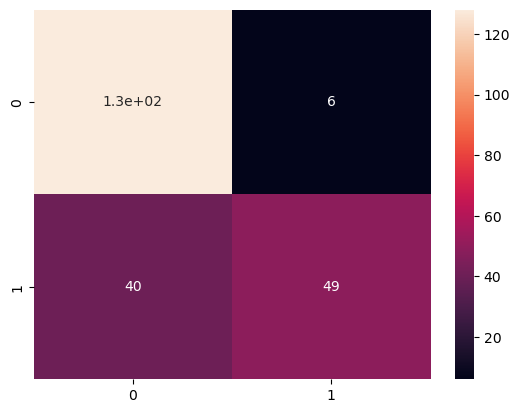

In [20]:
model_org = RandomForestClassifier(n_estimators=30,max_depth=3)
model_org.fit(X_train_class2, y_train_class2)
predicted_org = model_org.predict(X_test_class2)

# print("predicted data : ", predicted, "len predicted data : ", len(predicted))
# print("***********************************")
# print("original data : ", y_test, "len original data : ", len(y_test))
print("accuracy_score :", accuracy_score(y_test_class2, predicted_org))
print("classification_report :", classification_report(y_test_class2, predicted_org))
cm2 = confusion_matrix(y_test_class2, predicted_org)
sns.heatmap(cm2, annot = True) # annot = True pour afficher les nombres dans la matrice

---------------

#### 4.3- Regression 1:

In [21]:
# load dataset from seaborn
dataset2 = sns.load_dataset('tips')

# dataset infos
print("dataset shape : ", dataset2.shape)
print("tips dataset labels : ", list(dataset2.columns))
dataset2.head()

dataset shape :  (244, 7)
tips dataset labels :  ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'ordinal_column' is the name of the ordinal column
ordinal_column = ['sex', 'smoker', 'day', 'time']

# Use LabelEncoder to perform label encoding
label_encoder = LabelEncoder()
for i in ordinal_column:
    dataset2[i] = label_encoder.fit_transform(dataset2[i])

pd.DataFrame(dataset2).head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [23]:
X2 = dataset2.drop("tip", axis = 1).values
y2 = dataset2["tip"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

pd.DataFrame(X_train2).head()

,0,1,2,3,4,5
0,17.31,0.0,0.0,2.0,0.0,2.0
1,23.33,1.0,1.0,2.0,0.0,2.0
2,16.27,0.0,1.0,0.0,1.0,2.0
3,20.23,1.0,0.0,1.0,0.0,2.0
4,20.92,0.0,0.0,1.0,0.0,2.0


In [25]:
model2 = RandomForestRegressor2(n_trees=25, max_depth=3)
model2.fit(X_train2, y_train2)
predicted2 = model2.predict(X_test2)
# ============ validation ================
print("R² :", r2_score(y_test2, predicted2))
print("mean_squared_error :", mean_squared_error(y_test2, predicted2))
print("mean_absolute_error :", mean_absolute_error(y_test2, predicted2))
print("explained_variance_score :", explained_variance_score(y_test2, predicted2))

R² : 0.2583074729276761
mean_squared_error : 0.986766155751366
mean_absolute_error : 0.7238466810985739
explained_variance_score : 0.27885109565958466


Test the Original RF from sklearn :

In [26]:
model2_org = RandomForestRegressor(n_estimators=25, max_depth=3)
model2_org.fit(X_train2, y_train2)
predicted2_org = model2_org.predict(X_test2)
# ============ validation ================
print("R² :", r2_score(y_test2, predicted2))
print("mean_squared_error :", mean_squared_error(y_test2, predicted2_org))
print("mean_absolute_error :", mean_absolute_error(y_test2, predicted2_org))
print("explained_variance_score :", explained_variance_score(y_test2, predicted2_org))

R² : 0.2583074729276761
mean_squared_error : 0.9536258474403562
mean_absolute_error : 0.7076567818981123
explained_variance_score : 0.3003775949535238


#### 4.4- Regression 2:

In [18]:
dataset3 = pd.read_csv("Real estate.csv")
# dataset infos
print("dataset shape : ", dataset3.shape)
print("tips dataset labels : ", list(dataset3.columns))
dataset3

dataset shape :  (414, 8)
tips dataset labels :  ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [19]:
X3 = dataset3.drop("Y house price of unit area", axis = 1).values
y3 = dataset3["Y house price of unit area"].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

pd.DataFrame(X_train3).head()

,0,1,2,3,4,5,6
0,327.0,2013.500,4.1,56.47425,7.0,24.95744,121.53711
1,411.0,2012.667,5.6,90.45606,9.0,24.97433,121.54310
2,392.0,2013.583,6.2,1939.74900,1.0,24.95155,121.55387
3,353.0,2012.833,18.4,2674.96100,3.0,24.96143,121.50827
4,133.0,2013.167,26.6,482.75810,5.0,24.97433,121.53863


In [29]:
model3 = RandomForestRegressor2(n_trees=25, max_depth=3)
model3.fit(X_train3, y_train3)
predicted3 = model3.predict(X_test3)
# ============ validation ================
print("R² :", r2_score(y_test3, predicted3))
print("mean_squared_error :", mean_squared_error(y_test3, predicted3))
print("mean_absolute_error :", mean_absolute_error(y_test3, predicted3))
print("explained_variance_score :", explained_variance_score(y_test3, predicted3))

R² : 0.692612542729155
mean_squared_error : 48.75737104003838
mean_absolute_error : 5.001498261033684
explained_variance_score : 0.7004288452946661


Test the Original RF from sklearn :

In [30]:
model3_org = RandomForestRegressor(n_estimators=25, max_depth=3)
model3_org.fit(X_train3, y_train3)
predicted3_org = model3_org.predict(X_test3)
# ============ validation ================
print("R² :", r2_score(y_test3, predicted3_org))
print("mean_squared_error :", mean_squared_error(y_test3, predicted3_org))
print("mean_absolute_error :", mean_absolute_error(y_test3, predicted3_org))
print("explained_variance_score :", explained_variance_score(y_test3, predicted3_org))

R² : 0.6822881467208626
mean_squared_error : 50.39501237846506
mean_absolute_error : 5.138087193655687
explained_variance_score : 0.6891780927564003


# References
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html